# Perfom Linear Regression using closed form such as Normal Equation, SVD and using Gradient Descent methods

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)
X[0:2]

array([[1.08942799],
       [1.14502492]])

### X_b : feature data set with n = 2 features
### m = 100 so X_b is 2 columns with 100 rows of dataset

In [32]:
X_b = np.c_[np.ones((100,1)), X] #: add x0 = 1 to each instance
len(X_b)
print(X_b[0:2])

[[1.         1.08942799]
 [1.         1.14502492]]


In [33]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.47145134],
       [2.97470251]])

In [37]:
#: predict using theta_best
X_new = np.array(([0], [2]))
X_new_b = np.c_[np.ones((2,1)), X_new]
print(X_new_b)
y_predict = X_new_b.dot(theta_best)
y_predict

[[1. 0.]
 [1. 2.]]


array([[ 4.47145134],
       [10.42085636]])

In [45]:
X_new
y_predict

array([[ 4.47145134],
       [10.42085636]])

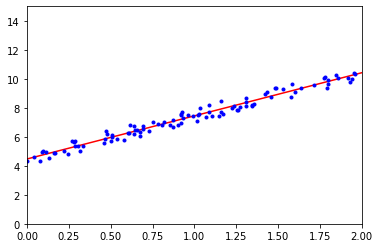

In [47]:
plt.plot(X_new, y_predict, "-r")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()




# Linear Regression using Sklearn


In [48]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_


(array([4.47145134]), array([[2.97470251]]))

In [49]:
lin_reg.predict(X_new)

array([[ 4.47145134],
       [10.42085636]])

### The LinearRegression class is based on the scipy.linalg.lstsq() function

In [51]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd)
print(residuals)
print(rank)
print(s)

[[4.47145134]
 [2.97470251]]
[7.77590703]
2
[14.36780437  3.75477354]


# GD

In [52]:
eta = 0.1 #: learning rate
n_iteration = 1000
m = 100 #: training instances

In [54]:
theta = np.random.rand(2,1)
theta

array([[0.61429452],
       [0.42347005]])

In [55]:
for iteration in range(n_iteration):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients
    
theta

array([[4.47145134],
       [2.97470251]])

# SGD

In [56]:
n_epochs = 50  #: number of time to iterate the training dataset
t0, t1 = 5, 50 #: learning schedule hyperparameters

#: as t increases the learning gets smaller
def learning_schedule(t):
    return t0 / (t + t1)

In [61]:
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m * i)
        theta = theta - eta * gradients
theta

array([[4.33459496],
       [2.89100769]])

# to perfom Linear Regression using SGD in Scikit-Learn, you can use the SGDRegressor class

In [66]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.44901869]), array([2.99437146]))

In [26]:
test = np.c_[np.array([[1,2,3]]),0, np.array([[4,5,6]])]
test

array([[1, 2, 3, 0, 4, 5, 6]])

In [17]:
test2 = np.c_[np.array([1,2,3]), np.array([4,5,6])]
test2

array([[1, 4],
       [2, 5],
       [3, 6]])

In [22]:
test = np.array([1,2,3])
test.shape

(3,)

In [23]:
test = np.array([[1,2,3]])
test.shape

(1, 3)